<a href="https://colab.research.google.com/github/Nagendra24290/Leaf_Desease_Detection/blob/main/Leaf_desease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os  # Operating system interfaces
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19

In [13]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/leaf/tomato/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),color_mode='rgb',seed=42,
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.


In [14]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/leaf/tomato/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),color_mode='rgb',seed=42,
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 10 classes.


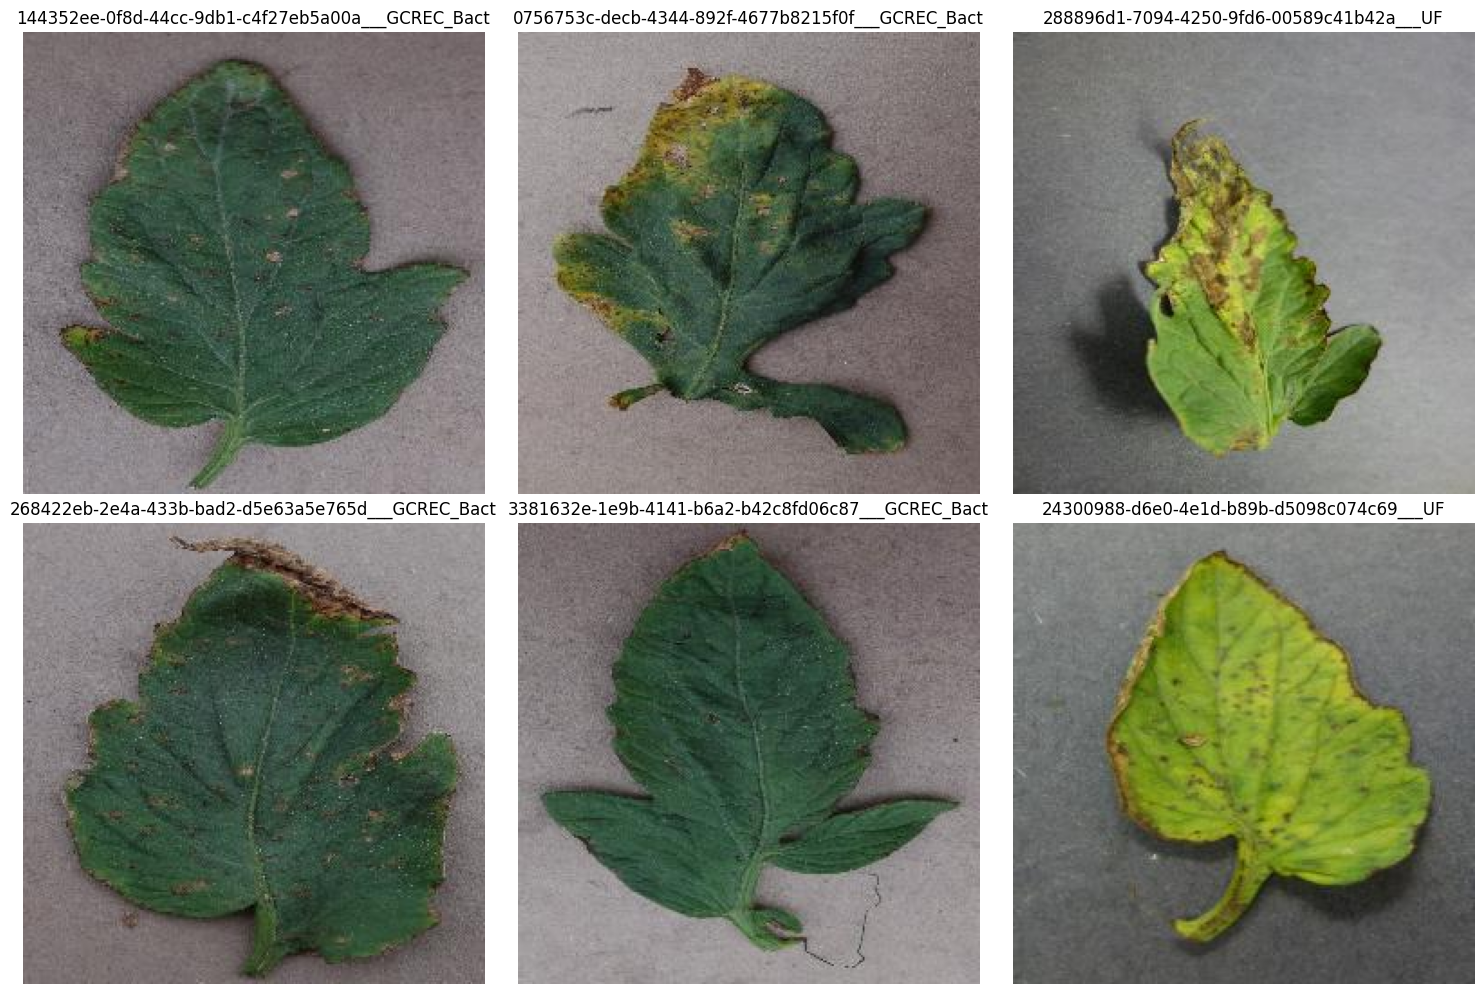

In [15]:
path = "/content/drive/MyDrive/leaf/tomato/train/Tomato___Bacterial_spot"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [16]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)
conv_base.trainable = False
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

In [20]:
history = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[early_stop])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 156ms/step - accuracy: 0.7788 - loss: 0.6883 - val_accuracy: 0.8650 - val_loss: 0.4774
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.8546 - loss: 0.4657 - val_accuracy: 0.8910 - val_loss: 0.3711
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.8807 - loss: 0.3672 - val_accuracy: 0.9090 - val_loss: 0.3210
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.8980 - loss: 0.3063 - val_accuracy: 0.9170 - val_loss: 0.2870
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.9237 - loss: 0.2638 - val_accuracy: 0.9180 - val_loss: 0.2639
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.9286 - loss: 0.2289 - val_accuracy: 0.9310 - val_loss: 0.2426
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.9323 - loss: 0.2047 - val_accuracy: 0.9300 - val_loss: 0.2296
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 122ms/step - accuracy: 0.9428 - loss: 0

<Axes: >

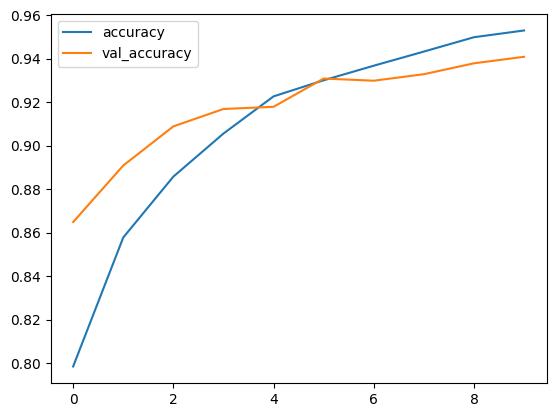

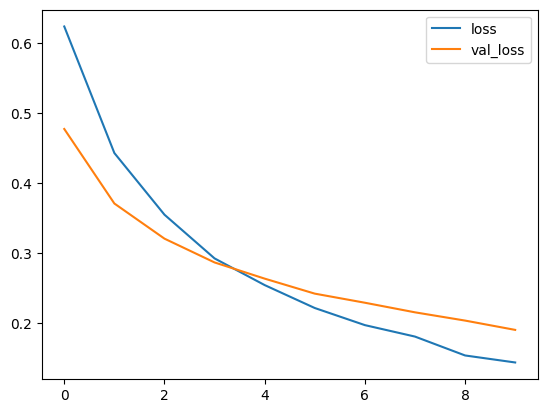

In [21]:
import pandas as pd
ef=pd.DataFrame(history.history)
ef[['accuracy','val_accuracy']].plot()
ef[['loss','val_loss']].plot()

32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 456ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.94      0.89      0.91       100
           2       0.90      0.97      0.93       100
           3       0.98      0.89      0.93       100
           4       0.94      0.92      0.93       100
           5       0.92      0.93      0.93       100
           6       0.92      0.90      0.91       100
           7       0.95      0.98      0.97       100
           8       0.92      0.98      0.95       100
           9       0.98      0.98      0.98       100

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



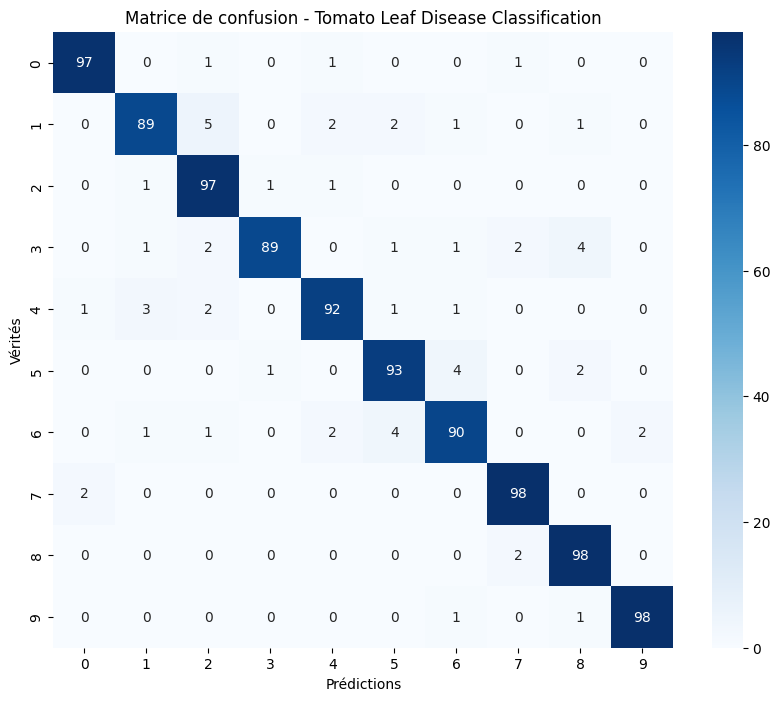

In [22]:
images = []
labels = []
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
for x, y in val_data.unbatch():
    images.append(x.numpy())
    labels.append(y.numpy())

images = np.array(images)
labels = np.array(labels)

y_pred_probs = model.predict(images, batch_size=32)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(labels, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion - Tomato Leaf Disease Classification")
plt.show()

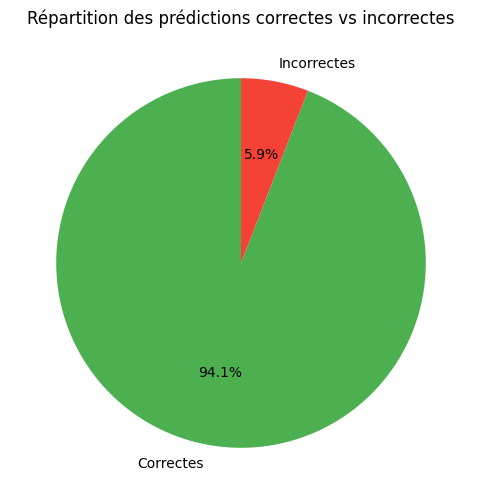

In [23]:
# Comptage des prédictions correctes et incorrectes
correct = np.sum(y_true == y_pred)
incorrect = np.sum(y_true != y_pred)
plt.figure(figsize=(6, 6))
plt.pie(
    [correct, incorrect],
    labels=["Correctes", "Incorrectes"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#4CAF50", "#F44336"]
)
plt.title("Répartition des prédictions correctes vs incorrectes")
plt.show()

In [25]:
model.save('leaf_disease_model.h5')

In [27]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('leaf_disease_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


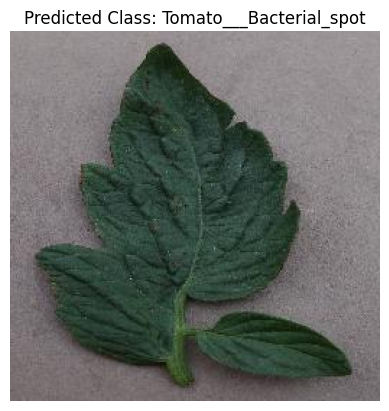

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img_array

# Function to predict the class of the image
def predict_image_class(model, img_array, class_names):
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name

# Define the class names (make sure these match the order in your training data)
class_names = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___healthy'
]


# Specify the path to your test image
test_image_path = '/content/drive/MyDrive/leaf/tomato/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'  # Replace with the actual path to your image

# Preprocess the image
preprocessed_image = preprocess_image(test_image_path)

# Make a prediction
predicted_class = predict_image_class(loaded_model, preprocessed_image, class_names)

# Display the image and the prediction
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()

In [30]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('leaf_disease_model.h5')

# Convert the model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Apply default optimizations, which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the quantized model
with open('leaf_disease_model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

print("Quantized model saved as 'leaf_disease_model_quantized.tflite'")

Saved artifact at '/tmp/tmp5l7d55qq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134318261170832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536823760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536824528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536824912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536823952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536822608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536822800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536819728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536819920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536825488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134318536824